# Introduction to Financial Time Series: Example of Log Returns and ACF

Author: Moritz Ahl 

Date: January 2022

Software: Windows 10, Python 3.9, Jupyter Notebook 6.4.5

In this notebook, the log returns of a stock will be compared to normally and t-distributed samples. Moreover, the ACFs of the absolute return will be plotted.

In [1]:
# load standard packages 
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
from statsmodels.graphics.tsaplots import plot_acf

# load Yahoo!Finance for download of market data
import yfinance as yf

In [2]:
# download price history of German Bayer stock
df = yf.download(tickers='BAYN.DE', start='2015-1-1', end='2021-12-31', interval='1d')
df = pd.DataFrame(df['Close'])
df

[*********************100%***********************]  1 of 1 completed


,Close
Date,
2015-01-02,111.202744
2015-01-05,107.463181
2015-01-06,108.693298
2015-01-07,108.693298
2015-01-08,114.597870
...,...
2021-12-23,46.625000
2021-12-27,47.090000
2021-12-28,47.150002


The formula for log returns $r$ is given by: 

\begin{equation*}
r_t = \log \left(\frac{X_{t+1}}{X_{t}} \right), \quad t = 1,\dots,n-1. 
\end{equation*} 

In [3]:
# extract the close prices and reshape them into 2d-array
data = np.array(df.values)
data = data.reshape((len(data),1))
data = data.astype('float32')
# compute log returns
z = np.array([0])
z = z.reshape((1,1))
ret = np.concatenate((z, np.log(data[1:] / data[:-1])))

# store in dataframe
df_ret = pd.DataFrame(ret, index=df.index, columns=['Log Return'])

# drop first row which has return 0 
df_ret.drop(index=df.index[0], axis=0, inplace=True)

# display df_ret
df_ret

,Log Return
Date,
2015-01-05,-0.034207
2015-01-06,0.011382
2015-01-07,0.000000
2015-01-08,0.052899
2015-01-09,-0.028748
...,...
2021-12-23,0.019382
2021-12-27,0.009924
2021-12-28,0.001273


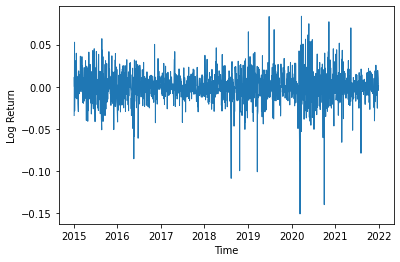

In [4]:
# plot returns 
plt.figsize=(12,5)
plt.plot(df_ret['Log Return'], lw=1)
plt.xlabel('Time')
plt.ylabel('Log Return')
plt.show()

In [5]:
# compute other statistical values
mean = np.mean(ret)
stdev = np.std(ret)

# parameter fitting für t-distribution
param = scipy.stats.t.fit(ret)

In [6]:
# simulate returns follwing a normal and t-distribution
y_n = np.random.normal(mean,stdev,len(df_ret))
y_t = scipy.stats.t.rvs(size = len(df_ret),loc=param[1], scale=param[2], df=param[0])

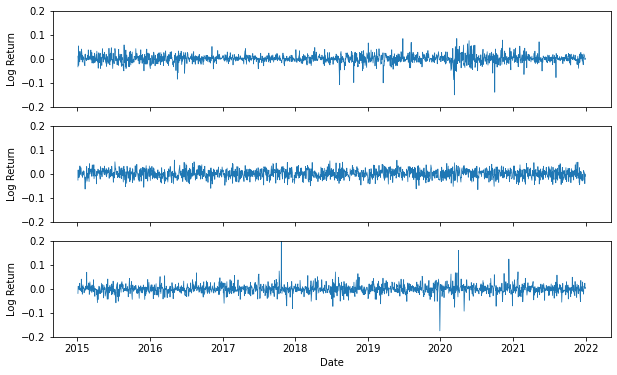

In [7]:
# plot log returns vs. normally distributed vs. t-distributed returns 
fig, axs = plt.subplots(3, sharex=True, figsize=(10,6))

axs[0].plot(df_ret.index, df_ret['Log Return'], lw=0.75)
axs[1].plot(df_ret.index, y_n, lw=0.75)
axs[2].plot(df_ret.index, y_t, lw=0.75)

for ax in axs:
    ax.set_ylim([-0.2, 0.2])
    ax.set(ylabel='Log Return') 
plt.savefig('C:/Users/morit/Documents/Studium/Master-Arbeit 2021/Master Thesis TeX/figures/intro.pdf')
plt.xlabel('Date')
plt.show()

Next, we turn to the ACFs for the absolute returns and the simulations.

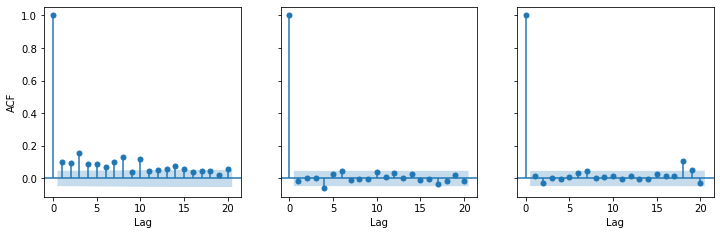

In [8]:
# plot ACFs of all three time series
fig, axs = plt.subplots(1,3, sharey=True, figsize=(12,3.5))
plot_acf(abs(df_ret['Log Return'].values), lags=20, ax=axs[0], alpha=.05,title='')
plot_acf(abs(y_n), lags=20, ax=axs[1], alpha=.05,title='')
plot_acf(abs(y_t), lags=20, ax=axs[2], alpha=.05,title='')
axs[0].set(ylabel='ACF')
for ax in axs:
    ax.set(xlabel='Lag') 
    
plt.savefig('C:/Users/morit/Documents/Studium/Master-Arbeit 2021/Master Thesis TeX/figures/Abs_Correlations.pdf')
plt.show()